<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

# $P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$

<p>Where:</p>

$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.

$P\left(S\right)$, the prior probability that a message is spam.

$P\left(\lnot S\right)$, the prior probability that a message is not spam.

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.

$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile.  I was able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import math

In [152]:
df = pd.read_csv("spam.csv")
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})
df.head(20)

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 108.9+ KB


In [163]:
# the other fields seem to be text overflow. They are very few in number so I will not account for them
df[df['Unnamed: 4'].notnull()].head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks]

In [164]:
clean = df[['Category', 'Message']]
clean.Message = clean.Message.str.replace('[^a-zA-Z\s]', '').str.lower()
clean.head(20)

<ipython-input-164-d1c37faeb18f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean.Message = clean.Message.str.replace('[^a-zA-Z\s]', '').str.lower()
C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


<h3>3. Split the Data</h3>
<p>Split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

<p>[1 Mark]</p>

In [165]:
train_data = clean.sample(frac=0.75)
test_data = clean[~clean.index.isin(train_data.index)]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 1605 to 1163
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4179 non-null   object
 1   Message   4179 non-null   object
dtypes: object(2)
memory usage: 65.3+ KB


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data not the test_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [166]:
word_counts = {}
for idx, row in train_data.iterrows():
    words = row.Message.split()
    for word in words:
        if word not in word_counts.keys():
            word_counts[word] = {"spam": 0, "ham": 0}
        word_counts[word][row.Category] += 1

word_counts = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts = word_counts.rename(columns={'index': 'Word', 'ham': '#Ham', 'spam': '#Spam'})
word_counts.head()

,Word,#Spam,#Ham
0,when,8,203
1,you,219,1378
2,came,1,20
3,to,514,1173
4,hostel,0,3


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[3 Marks]</p>



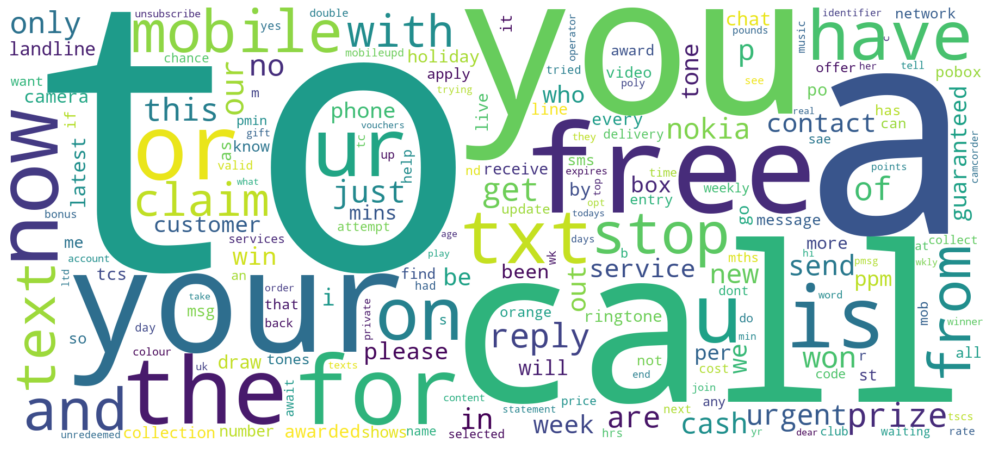

In [167]:
word_spams = [tuple(x) for x in word_counts[['Word', '#Spam']].values]
wordcloud = WordCloud(width=1800, height=800, background_color='white').generate_from_frequencies(dict(word_spams))

plt.figure(figsize=(18, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>

$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).

Likewise, for $P\left(E|\lnot S\right)$.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [168]:
# this will require some dirty code because str.contains(word) is not enough. str.contains('e') will return true for 'apple' even though it's not a standalone word.

k = 0.25

word_counts['Spam Messages'] = [0] * len(word_counts)
word_counts['Ham Messages'] = [0] * len(word_counts)

for idx, row in train_data.iterrows():
    if(row['Category'] == 'spam'):
        category = 'Spam Messages'
    else:
        category = 'Ham Messages'

    for word in row['Message'].split():
        word_counts.loc[word_counts['Word'] == word, category] += 1

word_counts.sort_values('Spam Messages', ascending=False).head()

,Word,#Spam,#Ham,Spam Messages,Ham Messages
3,to,514,1173,514,1173
65,a,283,781,283,781
69,call,270,177,270,177
1,you,219,1378,219,1378
11,your,204,329,204,329


In [169]:
# but apparently this was useless because not a single email contains the same word twice ):

word_counts[(word_counts['#Spam'] != word_counts['Spam Messages']) | (word_counts['#Ham'] != word_counts['Ham Messages'])].head()

,Word,#Spam,#Ham,Spam Messages,Ham Messages


In [170]:
# finally translate that into P(E|S) and P(E|¬S)

word_prob = word_counts[['Word']]

word_prob['P(E|S)'] = (word_counts['Spam Messages'] + k) / (len(train_data[train_data['Category'] == 'spam']) + 2*k)
word_prob['P(E|¬S)'] = (word_counts['Ham Messages'] + k) / (len(train_data[train_data['Category'] == 'ham']) + 2*k)

word_prob.head()

<ipython-input-170-a71002495268>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_prob['P(E|S)'] = (word_counts['Spam Messages'] + k) / (len(train_data[train_data['Category'] == 'spam']) + 2*k)
<ipython-input-170-a71002495268>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_prob['P(E|¬S)'] = (word_counts['Ham Messages'] + k) / (len(train_data[train_data['Category'] == 'ham']) + 2*k)


,Word,P(E|S),P(E|¬S)
0,when,0.014563,0.056247
1,you,0.387026,0.381417
2,came,0.002207,0.005604
3,to,0.907767,0.324685
4,hostel,0.000441,0.000899


<h3>7. Checking the 'spamliness' of a single word</h3>

Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.

We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.

### $P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$

<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [171]:
# P(S) and P(¬S) will start as their respective frequencies in the train data
P_s = len(test_data[test_data['Category'] == 'spam']) / len(test_data)
P_nots = len(test_data[test_data['Category'] == 'ham']) / len(test_data)

print(P_nots, P_s)

0.8700646087580761 0.1299353912419239


In [179]:
# P_s_e = P_e_s * P_s / P_e

word = word_prob.sample(1).iloc[0]

P_e_s = word['P(E|S)']
P_e_nots = word['P(E|¬S)']

P_s_e = P_e_s * P_s / (P_e_s * P_s + P_e_nots * P_nots)
P_nots_e = P_e_nots * P_nots / (P_e_nots * P_nots + P_e_s * P_s)

print(f"Word = {word['Word']}\nP(E|S) = {P_e_s}\nP(E|¬S) = {P_e_nots}\nP(S|E) = {P_s_e}\nP(¬S|E) = {P_nots_e}")

Word = members
P(E|S) = 0.003971756398940865
P(E|¬S) = 6.918500069185e-05
P(S|E) = 0.8955425077128147
P(¬S|E) = 0.1044574922871853


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [181]:
message = train_data.sample(1).iloc[0]
isSpam = message['Category'] == 'spam'
text = message['Message']

prob_spam = []
prob_ham = []

for word in text.split():
    probs = word_prob[word_prob['Word'] == word].iloc[0] # there are no empty words
    
    P_e_s = probs['P(E|S)']
    P_e_nots = probs['P(E|¬S)']

    P_s_e = P_e_s * P_s / (P_e_s * P_s + P_e_nots * P_nots)
    P_nots_e = P_e_nots * P_nots / (P_e_nots * P_nots + P_e_s * P_s)

    prob_spam.append(P_s_e)
    prob_ham.append(P_nots_e)

total_spam = math.prod(prob_spam)
total_ham = math.prod(prob_ham)
doISeeSpam = total_spam > total_ham

print(total_spam, total_ham)
print(text)
print(f"Is this spam? {isSpam}\nDo I see it as spam? {doISeeSpam}")
print(f"Calculated belief that it is spam: {total_spam}\nCalculated belief that it is ham: {total_ham}")

8.185791078565406e-10 3.086188555788689e-20
xmas prize draws we are trying to contact u todays draw shows that you have won a  prize guaranteed call  from land line valid hrs only
Is this spam? True
Do I see it as spam? True
Calculated belief that it is spam: 8.185791078565406e-10
Calculated belief that it is ham: 3.086188555788689e-20


<h3>9. Avoiding floating point underflow</h3>

Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$


Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$
$$\log(a\cdot b)=\log(a)+\log(b)$$
i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):
$$P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
becomes
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ 
$$\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))$$
So, to check spam or ham we just compare:
$$\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))$$
and 
$$\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))$$


Change the equation so that logs are used.
</p>
<p>[1 Mark]</p>

In [182]:
# calculating with numerators only, the formula becomes P(S|E) ~ P(E|S) * PS and equally P(¬S|E) ~ P(E|¬S) * P¬S
# will use ln but the result is the same regardless of the base so long as it is over 1 (?)

word_prob['P(E|S)'] = word_prob['P(E|S)'].apply(lambda x: math.log(x))
word_prob['P(E|¬S)'] = word_prob['P(E|¬S)'].apply(lambda x: math.log(x))
word_prob.head()

<ipython-input-182-1d7ed5459f51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_prob['P(E|S)'] = word_prob['P(E|S)'].apply(lambda x: math.log(x))
<ipython-input-182-1d7ed5459f51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_prob['P(E|¬S)'] = word_prob['P(E|¬S)'].apply(lambda x: math.log(x))


,Word,P(E|S),P(E|¬S)
0,when,-4.229264,-2.877995
1,you,-0.949264,-0.963862
2,came,-6.116334,-5.184277
3,to,-0.096768,-1.124899
4,hostel,-7.725771,-7.013777


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [183]:
no_tests = 0
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for idx, row in test_data.iterrows():
    message = row['Message']
    isSpam = row['Category'] == 'spam'

    total_ham = 0
    total_spam = 0
    for word in message.split():
        probs = word_prob[word_prob['Word'] == word]
        if(len(probs) > 0):
            probs = probs.iloc[0]
            total_ham += probs['P(E|¬S)']
            total_spam += probs['P(E|S)']
    doISeeSpam = total_spam > total_ham

    no_tests += 1
    if(isSpam == doISeeSpam):
        if(isSpam == True):
            match_spam += 1
        else:
            match_ham += 1
    else:
        if(isSpam == True):
            thought_spam_is_ham += 1
        else:
            thought_ham_is_spam += 1

accuracy = (match_ham + match_spam) / no_tests

print("Spam matches:", match_spam)
print("Ham matches:", match_ham)
print("Ham mislabels:", thought_ham_is_spam)
print("Spam misses:", thought_spam_is_ham)
print(f"Total accuracy: {round(accuracy * 100, 2)}%")

Spam matches: 177
Ham matches: 1083
Ham mislabels: 129
Spam misses: 4
Total accuracy: 90.45%


<h3>11. Improvements</h3>
<p>Give some suggestions or recommendations on how the accuracy of the model could be improved.</p>
<p>[1 Mark]</p>

#### Changing $P\left(E\middle| S\right)$

One possible improvement would be changing the way we calculate the probability of a word appearing in a spam email. As it is, the probability is the number of spam messages containing the word divided by total count of spam messages. If we use the 'share of spam words' i.e. the number of appearances of the word in spam divided by the total count of words in spam messages, the accuracy will go up because this method accounts better for the difference in sets of words between spam and non-spam. I have done this and obtained the following result:

Spam matches: 166

Ham matches: 1192

Ham mislabels: 19

Spam misses: 16

Total accuracy: 97.49% -> which is already significantly better

Additionally, the target is to have as few spam misses as possible *while having few to no ham mislabels*. From this perspective, this model is vastly better. 

The changed code is included below:

In [ ]:
# the only change in code is step 6:

spam_totals = word_counts['#Spam'].sum()
ham_totals = word_counts['#Ham'].sum()

word_prob = word_counts[['Word']]
word_prob['P(E|S)'] = (word_counts['#Spam'] + k) / (spam_totals + 2*k)
word_prob['P(E|¬S)'] = (word_counts['#Ham'] + k) / (ham_totals + 2*k)

Another possible change to $P\left(E\middle| S\right)$ is using the count of appearances in spam divided by the number of spam emails. This means that the values will no longer be standard probabilities but rather expected values that can go over 1.

However, in this set they don't go over 100% and the maximum is $P\left('to'\middle| S\right) \approx 0.9$. That is because the entries do not contain duplicate words (as noted in my code in step 6). In a real example these numbers would not be the same because of duplicate words in the same message.

The code for this change is pasted below:

In [ ]:
# the only change in code is step 6:

word_prob = word_counts[['Word']]

word_prob['P(E|S)'] = (word_counts['#Spam'] + k) / (len(train_data[train_data['Category'] == 'spam']) + 2*k)
word_prob['P(E|¬S)'] = (word_counts['#Ham'] + k) / (len(train_data[train_data['Category'] == 'ham']) + 2*k)

### Other changes

There are many possible changes to our methods that may yield better results. Some of them are:
* Throwing out infrequent words - words with total occurence of 1-2 could be ignored altogether. They are too rare to realistically change our expectations in most cases. Although an intuitive change would be to do the opposite (i.e. remove the most common words such as 'a' or 'to'), I believe a trend can be concluded from common words, at least moreso than from rare words. For example, spam emails may be more formal and verbose, resulting in a larger number of 'the'.
* Accounting for message length - In addition to the previous point, a more complex analysis may include message lengths into the calculation. I would expect shorter messages to be indicative of a non-spam email.
* Better cleaning - indiscriminate deletion of punctuation creates some odd words and removes some sensitivity from the list. Furthermore, some non-alpha values could be useful e.g. the frequency of numeric characters may be higher in spam and phone numbers may be trackable to spam or non-spam sources
* Chaining words - in natural language processing an extremely important point is the relationship between two words that appear in the same context. While accounting for context is probably the best idea in the list, it is also the most complex.